### Introduction to summary statistics: The sample mean and median 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('iris.csv', names=['sepal length(cm)','sepal width (cm)','petal length (cm)',
                                     'petal width (cm)','species'])
df.species = df.species.str.replace('Iris-', '')
#df

In [3]:
versicolor = df[df['species'] == 'versicolor']
versicolor_petal_length = np.array(versicolor['petal length (cm)'])
versicolor_petal_width = np.array(versicolor['petal width (cm)'])
setosa = df[df['species'] == 'setosa']
setosa_petal_length = np.array(setosa['petal length (cm)'])
setosa_petal_width = np.array(setosa['petal width (cm)'])
virginica = df[df['species'] == 'virginica']
virginica_petal_length = np.array(virginica['petal length (cm)'])
virginica_petal_width = np.array(virginica['petal width (cm)'])

In [4]:
mean_length_vers = np.mean(versicolor_petal_length)
print('I. versicolor:', mean_length_vers, 'cm')\

I. versicolor: 4.26 cm


### Percentiles, outliners, and box plots

In [5]:
df_swing = pd.read_csv('2008_swing_states.csv')
np.percentile(df_swing['dem_share'], [25,50,75])

array([37.3025, 43.185 , 49.925 ])

In [6]:
percentiles = np.array([2.5, 25, 50, 75, 97.5])
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)
ptiles_vers

array([3.3   , 4.    , 4.35  , 4.6   , 4.9775])

In [7]:
def ecdf(data):
    '''Compute ECDF for a one-dimensional array of measurements'''
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    return x, y

In [8]:
x_vers, y_vers = ecdf(versicolor_petal_length)
x_set, y_set = ecdf(setosa_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

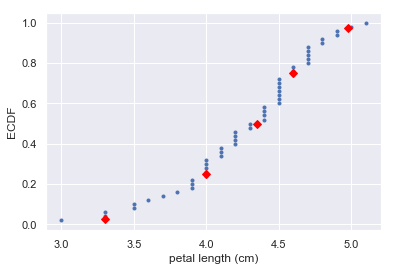

In [9]:
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')
plt.show()

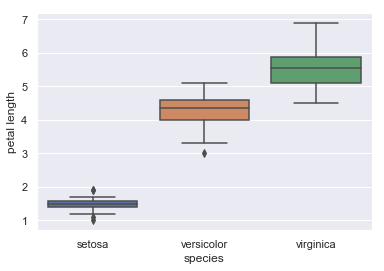

In [10]:
_ = sns.boxplot(x='species', y='petal length (cm)', data = df)
_ = plt.xlabel('species')
_ = plt.ylabel('petal length')
plt.show()

### Variance and standard deviation 

#### Variance
- The mean squared distance of the data from thier mean
- Informally, a measure of the spread of data

In [11]:
dem_share_FL = df_swing.loc[df_swing['state'] == 'FL']['dem_share']
np.var(dem_share_FL)

147.44278618846064

#### Computing the standard deviation 

In [12]:
np.std(dem_share_FL), np.sqrt(np.var(dem_share_FL))

(12.142602117687158, 12.142602117687158)

In [13]:
differences = versicolor_petal_length - np.mean(versicolor_petal_length)
differences

array([ 0.44,  0.24,  0.64, -0.26,  0.34,  0.24,  0.44, -0.96,  0.34,
       -0.36, -0.76, -0.06, -0.26,  0.44, -0.66,  0.14,  0.24, -0.16,
        0.24, -0.36,  0.54, -0.26,  0.64,  0.44,  0.04,  0.14,  0.54,
        0.74,  0.24, -0.76, -0.46, -0.56, -0.36,  0.84,  0.24,  0.24,
        0.44,  0.14, -0.16, -0.26,  0.14,  0.34, -0.26, -0.96, -0.06,
       -0.06, -0.06,  0.04, -1.26, -0.16])

In [14]:
diff_sq = differences ** 2
diff_sq

array([0.1936, 0.0576, 0.4096, 0.0676, 0.1156, 0.0576, 0.1936, 0.9216,
       0.1156, 0.1296, 0.5776, 0.0036, 0.0676, 0.1936, 0.4356, 0.0196,
       0.0576, 0.0256, 0.0576, 0.1296, 0.2916, 0.0676, 0.4096, 0.1936,
       0.0016, 0.0196, 0.2916, 0.5476, 0.0576, 0.5776, 0.2116, 0.3136,
       0.1296, 0.7056, 0.0576, 0.0576, 0.1936, 0.0196, 0.0256, 0.0676,
       0.0196, 0.1156, 0.0676, 0.9216, 0.0036, 0.0036, 0.0036, 0.0016,
       1.5876, 0.0256])

In [15]:
variance_explicit = np.mean(diff_sq)
variance_explicit

0.21640000000000004

In [16]:
variance_np = np.var(versicolor_petal_length)
variance_np

0.21640000000000004

In [17]:
# The standard deviation and the variance
variance = np.var(versicolor_petal_length)
np.sqrt(variance)

0.4651881339845203

In [18]:
np.std(versicolor_petal_length)

0.4651881339845203

### Covariance and the Pearson correlation coefficient

In [19]:
df_swing

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04
5,PA,Wayne County,22835,9892,12702,43.78
6,PA,Susquehanna County,19286,8381,10633,44.08
7,PA,Warren County,18517,8537,9685,46.85
8,OH,Ashtabula County,44874,25027,18949,56.94
9,OH,Lake County,121335,60155,59142,50.46


In [20]:
dem_share = df_swing['dem_share']
total_votes = df_swing['total_votes']
#total_votes

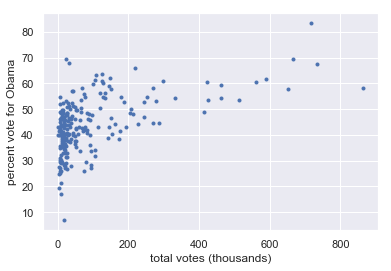

In [21]:
_ = plt.plot(total_votes/1000, dem_share,
            marker='.', linestyle='none')
_ = plt.xlabel('total votes (thousands)')
_ = plt.ylabel('percent vote for Obama')

### Covariance
- A measure of how two quantities vary *together*
$$ covariance~=~\frac{1}{n}\displaystyle\sum_{i=1}^{n} (x_i-\bar{x})(y_i-\bar{y}) $$

### Pearson correlation coefficient
$$ \rho = Pearson~correlation = \frac{covariance}{(std~of~x)(std~of~y)} $$
<br>
$$ = \frac{variablity~due~to~codependence}{independent~variability} $$

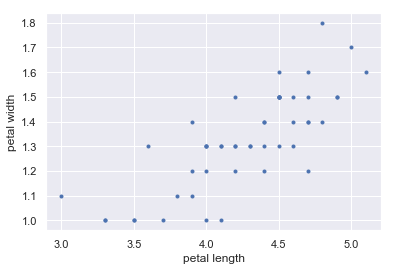

In [22]:
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')
_ = plt.xlabel('petal length')
_ = plt.ylabel('petal width')
plt.show()

In [26]:
# Computing the covariance
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)
print(covariance_matrix)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]


In [27]:
petal_cov = covariance_matrix[0,1]
print(petal_cov)

0.07310204081632653


In [28]:
def pearson_r(x,y):
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]

r = pearson_r(versicolor_petal_length, versicolor_petal_width)
print(r)

0.7866680885228169
